<a href="https://colab.research.google.com/github/fundaylncii/MachineLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Bağımlı ve bağımsız değişkenler arasındaki ilişkiyi doğrusal olarak moddellemektedir
## y = b + wx
## w : ilgili değişkenlerin etkilerini ifade eder

In [ ]:
## Ağırlıkların Bulunması:
## Gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin toplamını/prtalamasını minimum yapabilecek b ve w değerleri bulunur.


In [ ]:
## optimum doğrusal tahmin grafiğinin oluşturulması için cost fonksiyonu çıakrtılır.
## cost = mse

In [ ]:
## Regresyon Modellerinde Başarı Değerlendirme (mse,rmse,mae):

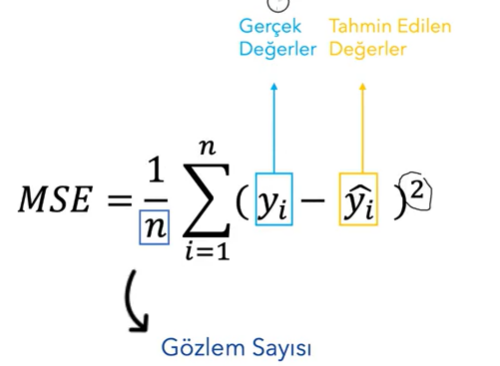

In [ ]:
## Mean Squared Error: Hata Kareler Toplamı
## mse değeri gerçek değerlerin ortalamasına yakın olması kabul edilebilirliğini gösterir. Ortalamanın altına düşülmesi gerekmektedir.
## mse değeri 0'a yakın olması kabul edilebilirliğini gösterir

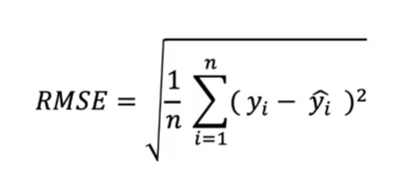

In [ ]:
## Root Mean Squared Error: Hata Kareler Toplamı Karakökü

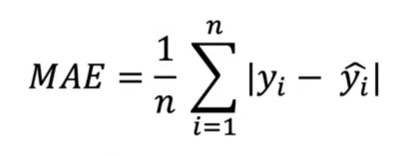

In [ ]:
## Mean Absolute Error : Mutlak Değerler Ortaması

In [ ]:
## Parametrelerin Tahmin Edilmesi - Ağırlıkların Bulunması :

## En küçük hatayı veren sabitlerin bulunması işlemidir.
## Cost = MSE

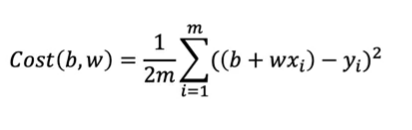

In [ ]:
## Yöntem 1 : Analiktik Çözüm : Normal Denklemler Yöntemi : En Küçük Kareler Yöntemi

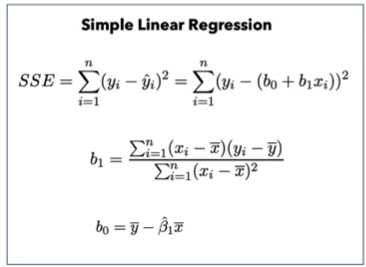

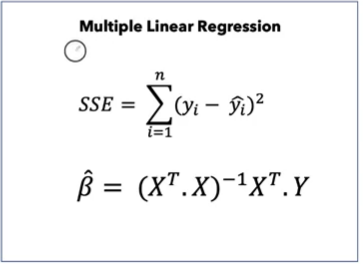

In [ ]:
## gözlem sayısı ve değişken sayısı çok olması durumunda multiple linear regression final çözümündeki matris tersini işlemi çok uzun sürmektedir.
## bu durum farklı çözümlere ihtiyaç duyulmasının sebebidir.

In [ ]:
## Yöntem 2 : Optimizasyon Çözümü : Gradient Descent

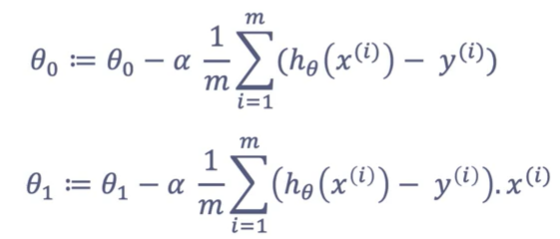

In [ ]:
## bir optimizasyon yöntemidir.
## gradyanın negatifine doğru giderek ilgili parametre değerini günceller ve fonksiyonu min. yapacak parametre değerine ulşamaya çalışır

In [ ]:
## bir fonksiyonun gradyanı : türevi : grafiğin artış yönü

In [ ]:
## Cost fonksiyonunu minimize edebilecek parametreleri bulmak için kullanılır

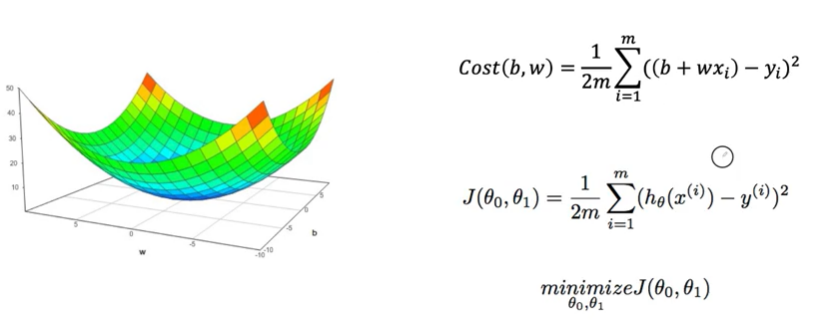

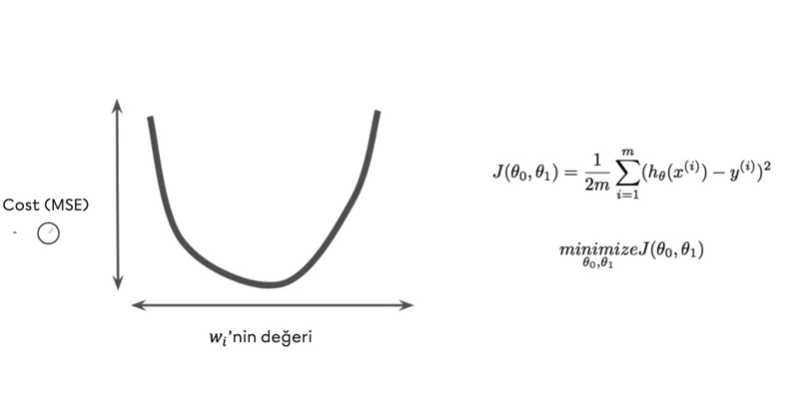

In [ ]:
## learning rate: öğrenme oranı

In [ ]:
## Basit Doğrusal Regresyon Modeli - Sales Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
df_ = pd.read_csv("/content/advertising.csv")
df = df_.copy()
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [ ]:
X = df[["TV"]]
y = df[["sales"]]

In [ ]:
## Model oluşturma:

reg_model = LinearRegression().fit(X,y)

In [ ]:
## y_hat = b + w*x

In [ ]:
## sabit (b - bias)
reg_model.intercept_[0]

7.032593549127695

In [ ]:
## TV nin katsayısı = w
reg_model.coef_[0][0]

0.04753664043301975

In [ ]:
## Tahminleme:

## 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

14.163089614080658

<function matplotlib.pyplot.show(close=None, block=None)>

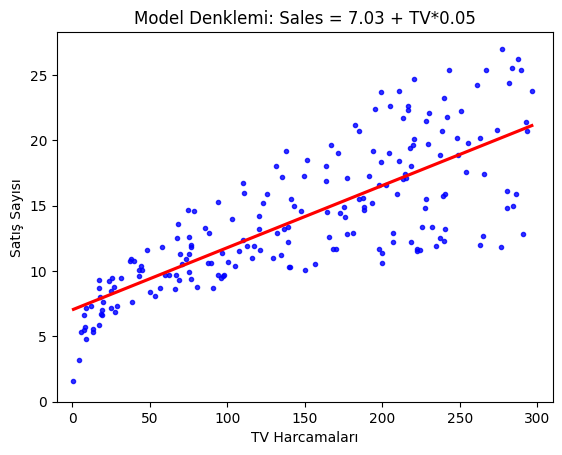

In [ ]:
## Modelin Görselleştirilmesi:
g = sns.regplot(x=X, y=y, scatter_kws={"color": "b","s":9},
                ci=False, color="r")
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0],2)} + TV*{round(reg_model.coef_[0][0],2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show

In [ ]:
## Tahmin Başarısının Değerlendirmesi:
y_pred = reg_model.predict(X) ## tahmin edilen değerler
mean_squared_error(y, y_pred)

10.512652915656757

In [ ]:
print(y.mean())
print(y.std())

sales   14.02
dtype: float64
sales   5.22
dtype: float64


In [ ]:
## mse ne kadar küçük ise model o kadar başarılı.
## bu modelde mse değerinin 1 e yakın olması beklenir
## bağımlı değişkenin ortlamasına göre değerlendirilir.

In [ ]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(rmse)

3.2423221486546887


In [ ]:
mae = mean_absolute_error(y, y_pred)
print(mae)

2.549806038927486


In [ ]:
## R-Kare : bağımsız değişkenlerin bağımlı değişkendeki değişikliği açıklama yüzdesidir
reg_model.score(X,y)

0.611875050850071

In [ ]:
## Çoklu Doğrusal Regresyon Modeli:

df = df_.copy()
X = df.drop("sales", axis=1)
y= df[["sales"]]

In [ ]:
## Model oluşturma:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
reg_model = LinearRegression().fit(X_train, y_train)

In [ ]:
## Sabit (b - bias):
reg_model.intercept_[0]

2.907947020816433

In [ ]:
## coefficients (w - weights)
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [ ]:
## Tahminleme İşlemi:

##TV 30
## radio 10
## newspaper 40

th1 = reg_model.intercept_[0] + reg_model.coef_[0][0] * 30
th2 = reg_model.intercept_[0] + reg_model.coef_[0][1] * 10
th3 = reg_model.intercept_[0] + reg_model.coef_[0][2] * 40
print(th1,th2,th3)


4.3132401161261456 4.693390458905194 3.011394464575993


In [ ]:
## Tahmin Başarısının Değerlendirilmesi:

## Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.736902590147092

In [ ]:
## Train R_Kare
reg_model.score(X_train,y_train)

0.8959372632325174

In [ ]:
## yeni değişkenler arttıkça hata oranı azaldı başarı oranı arttı.

In [ ]:
## Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.4113417558581587

In [ ]:
## Test R-Kare
reg_model.score(X_test,y_test)

0.8927605914615384

In [ ]:
## 10 katlı cross validation ile rmse hesabı
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

1.6913531708051797

In [ ]:
## Gradient Descent ile Doğrusal Regresyon: Simple Linear

## cost function
def cost_function(Y, b, w, X):
  m = len(Y)
  see = 0
  for i in range(0, m):
    y_hat = b + w * X[i]
    y = Y[i]
    see += (y_hat - y) ** 2
  mse = see / m
  return mse

In [ ]:
## update weights

def update_weights(Y, b, w, X, learning_rate):
  m = len(Y)
  b_deriv_sum =0
  w_deriv_sum =0
  for i in range(0, m):
    y_hat = b + w * X[i]
    y = Y[i]
    b_deriv_sum += (y_hat - y)
    w_deriv_sum += (y_hat - y) * X[i]
  new_b = b - learning_rate * (1/m) * b_deriv_sum
  new_w = w - learning_rate * (1/m) * w_deriv_sum
  return new_b, new_w

In [ ]:
## train function:

def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w

In [ ]:
df = df_.copy()
df.head()
X = df["radio"]
Y = df["sales"]

In [ ]:
## parametre : veri kullanılarak bulunan değerlerdir
## hiper_parametre: veri setinden bulunamayan kullanıcı tarafından belirlenen parametrelerdir.

In [ ]:
## gradient descent de ayarlanması gereken hiperparametreler vardır

In [ ]:
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 10000

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25